# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [130]:
# Downloading nltk files
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords', 'maxent_ne_chunker', 'words', 'omw'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

True

In [131]:
# importing libraries

import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import re
from joblib import dump, load

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, precision_recall_fscore_support, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time

In [132]:
# loading data from database
engine = create_engine('sqlite:///Disaster_Msgs.db')

# Read SQL database into dataframe
df = pd.read_sql('SELECT * FROM df', engine)

In [133]:
# Selecting features and labels
X = df['message'].values
y = df.iloc[:, 4:].values

In [134]:
# List of features
df.iloc[:, 4:].columns

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

### 2. Write a tokenization function to process your text data

In [135]:
def treebank_to_wordnet(treebank_tag):
    '''Converts treebank to wordnet tag'''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN    

In [136]:
def tokenize(text, tag_pos=False):
    '''Removes punctuation and stopwords, normalizes to lowercase.
       Lemmatizes tokens with option to use pos_tagging    
    '''
    text = re.sub(r"[^a-zA-Z0-9]", " ", text).lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    
    if tag_pos:
        tags = [treebank_to_wordnet(tag[1]) for tag in pos_tag(tokens)]
        lemmed = [WordNetLemmatizer().lemmatize(token, pos=tags[i]) for i, token in enumerate(tokens)]
        
    else:
        lemmed = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    
    return tokens

In [156]:
def tokenize(text):
    '''Removes punctuation and stopwords, normalizes to lowercase.
       Lemmatizes tokens with option to use pos_tagging    
    '''
    text = re.sub(r"[^a-zA-Z0-9]", " ", text).lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    lemmed = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    return tokens

In [157]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(AdaBoostClassifier()))
     ])

In [54]:
def tokenize(text):
    '''Removes punctuation and stopwords, normalizes to lowercase.
       Lemmatizes tokens with option to use pos_tagging    
    '''
    tokens = word_tokenize(text)
    lemmed = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    
    return tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [57]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize, strip_accents='ascii', lowercase=True, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(AdaBoostClassifier()))
     ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [138]:
start_time = time.time()
pipeline.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

KeyboardInterrupt: 

In [66]:
# Save model
# dump(pipeline, 'pipeline_best_model_adaboost_first_attempt.joblib')

['pipeline_best_model_adaboost_first_attempt.joblib']

In [30]:
# Load model
# pipeline = load('pipeline_best_model_adaboost_first_attempt.joblib')

In [68]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize, strip_accents='ascii', lowercase=True, stop_words='english')),
    ('clf', MultiOutputClassifier(AdaBoostClassifier()))
     ])

In [96]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...or=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=None))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [152]:
# Predicting message output classifications

start_time = time.time()
y_pred = pipeline.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 157.90120315551758 seconds ---


In [153]:
# Creating DataFrames of test lables and test predictions

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)

In [154]:
# Calculating precision, recall and f1-score for each output label and appending to DataFrame

scores = []
for column in y_pred_df.columns:
    scores.append(precision_recall_fscore_support(y_test_df[column], y_pred_df[column], average='weighted'))

results_df = pd.DataFrame(scores, columns=['precision', 'recall', 'f1-score', 'drop'], index=df.iloc[:, 4:].columns).drop('drop', axis=1)
results_df

,precision,recall,f1-score
related,0.744192,0.764114,0.685509
request,0.886450,0.893348,0.883059
offer,0.989950,0.993897,0.991919
aid_related,0.761729,0.760146,0.752849
medical_help,0.906998,0.924474,0.906653
medical_products,0.949809,0.956820,0.946713
search_and_rescue,0.969209,0.976655,0.969209
security,0.967134,0.980165,0.972987
military,0.963750,0.970857,0.965523
child_alone,1.000000,1.000000,1.000000


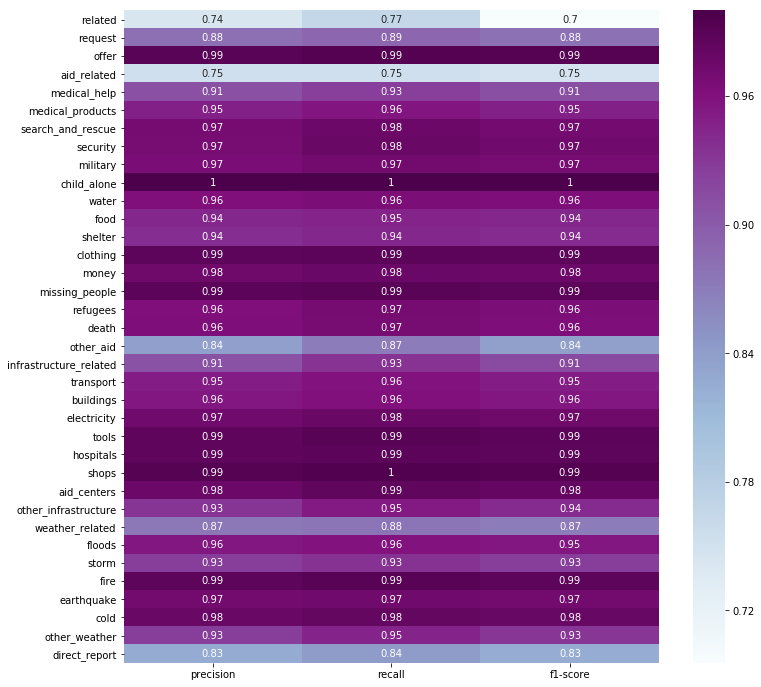

In [100]:
# Visualising results as heatmap
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(results_df, cmap="BuPu", annot=True)

Random state 42

with no_pos - randomforest defaults
precision    0.934488
recall       0.944326
f1-score     0.932509

with pos - randomforest defaults
precision    0.933945
recall       0.944525
f1-score     0.932762

Adaboost:
precision    0.938983
recall       0.946843
f1-score     0.938538

In [101]:
# Averaging results across features (non-weighted average) for overall model score.

results_df.mean()

precision    0.939019
recall       0.946860
f1-score     0.938565
dtype: float64

no tfidf

precision    0.937108
recall       0.946123
f1-score     0.937470
dtype: float64

with tfidf

precision    0.935287
recall       0.945339
f1-score     0.935233
dtype: float64

with optimal setting but countvectorizer detauls
    precision    0.937626
recall       0.946055
f1-score     0.937603
dtype: float64
    

In [145]:
results_df.mean()

precision    0.940202
recall       0.947581
f1-score     0.936706
dtype: float64

In [155]:
results_df.mean()

precision    0.939846
recall       0.947538
f1-score     0.937653
dtype: float64

In [103]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...or=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=None))])>

precision    0.939019
recall       0.946860
f1-score     0.938565
dtype: float64

with

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...or=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=None))])>
           
           using own word tokenizer

In [ ]:


### 6. Improve your model
Use grid search to find better parameters. 

In [76]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize, strip_accents='ascii', max_df=0.75, ngram_range=(1,2), lowercase=True, stop_words='english')),
    ('clf', MultiOutputClassifier(AdaBoostClassifier(n_estimators=100)))
     ])

In [159]:
# Selecting gridsearch parameters

parameters = {
    'clf__estimator__n_estimators': [50, 100],
    'clf__estimator__learning_rate': [1.0, 0.1],    
    'tfidf__use_idf': (True, False),
    'vect__max_df': [1.0, 0.75],
    'vect__ngram_range': ((1, 1), (1,2))
    }

cv = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1)

In [ ]:
start_time = time.time()
cv.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
# Save model
#dump(cv, 'pipeline_save_gridsearch.joblib')

In [ ]:
# Load saved gridsearch
#cv = load('pipeline_save_gridsearch.joblib')

In [36]:
# Gridsearch results
pd.DataFrame(cv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__estimator__learning_rate,param_clf__estimator__n_estimators,param_tfidf__use_idf,param_vect__max_df,param_vect__ngram_range,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,147.758368,1.384818,10.077398,0.157431,1,50,True,1,"(1, 1)","{'clf__estimator__learning_rate': 1.0, 'clf__e...",...,0.209490,0.196979,0.205015,0.005694,12,0.236955,0.237031,0.216967,0.230317,0.009440
1,552.697724,8.291485,29.217571,0.708578,1,50,True,1,"(1, 2)","{'clf__estimator__learning_rate': 1.0, 'clf__e...",...,0.208880,0.214220,0.209592,0.003524,6,0.240159,0.237565,0.232835,0.236853,0.003032
2,164.687922,31.062519,15.614594,8.774401,1,50,True,0.75,"(1, 1)","{'clf__estimator__learning_rate': 1.0, 'clf__e...",...,0.214678,0.195148,0.205269,0.007989,11,0.229402,0.233598,0.215594,0.226198,0.007691
3,629.677657,4.986810,21.908774,0.474514,1,50,True,0.75,"(1, 2)","{'clf__estimator__learning_rate': 1.0, 'clf__e...",...,0.207659,0.198200,0.202726,0.003873,15,0.231843,0.234437,0.221620,0.229300,0.005533
4,219.905013,7.770945,20.302069,5.056809,1,50,False,1,"(1, 1)","{'clf__estimator__learning_rate': 1.0, 'clf__e...",...,0.213610,0.207049,0.208473,0.003751,7,0.231157,0.233293,0.222154,0.228868,0.004827


In [37]:
cv.best_params_

{'clf__estimator__learning_rate': 1.0,
 'clf__estimator__n_estimators': 100,
 'tfidf__use_idf': False,
 'vect__max_df': 0.75,
 'vect__ngram_range': (1, 2)}

In [39]:
cv.best_score_

0.21757705218187368

In [ ]:
# Using best parameter combination:

parameters = {
    'clf__estimator__n_estimators': 100,
    'clf__estimator__learning_rate': 1.0,    
    'tfidf__use_idf': False,
    'vect__max_df': 0.75,
    'vect__ngram_range': ((1,2))
    }

In [102]:
testing new mo

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...or=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=None))])>

In [105]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x0000023715F28950>,
           vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
             learning_rate=1.0, n_estimators=50, random_state=None),
              n_jobs=None))],
 'vect': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
 

Testing new models:

In [121]:
def tokenize(text, tag_pos=False):
    '''Removes punctuation and stopwords, normalizes to lowercase.
       Lemmatizes tokens with option to use pos_tagging    
    '''
    text = re.sub(r"[^a-zA-Z0-9]", " ", text).lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    
    if tag_pos:
        tags = [treebank_to_wordnet(tag[1]) for tag in pos_tag(tokens)]
        lemmed = [WordNetLemmatizer().lemmatize(token, pos=tags[i]) for i, token in enumerate(tokens)]
        
    else:
        lemmed = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    
    return tokens

In [150]:
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2), tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.5), n_jobs=-1)
    )])

In [151]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...mator=None,
          learning_rate=0.5, n_estimators=100, random_state=42),
           n_jobs=-1))])

In [147]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x0000023727B61158>,
           vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
             learning_rate=0.5, n_estimators=100, random_state=42),
              n_jobs=-1))],
 'vect': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
    

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.